# Projeto Final – Fase 2
Este notebook contém a análise exploratória dos dados de jogos eletrônicos,
utilizando Python com pandas, numpy e matplotlib.

Estrutura:
- Pré-processamento dos dados
- Respostas às perguntas da empresa
- Visualizações solicitadas
- Pergunta e gráfico adicionais
- Conclusões


In [1]:
# CÉLULA 1: Configuração Inicial e Importação de Módulos

import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join('..', 'src')))

%matplotlib inline 

from preprocess import load_data, preprocess
from estilo_plot import aplicar_estilo 
from consultas import top10_metacritic, rpg_stats, top5_publishers_paid, linux_growth_2018_2022, paid_vs_free_reviews
from viz import grafico_percentual_por_sistema, grafico_singleplayer_indie_estrategia, grafico_paid_free_por_ano

## Carga e pré-processamento dos dados
Nesta etapa carregamos o CSV original, tratamos colunas numéricas e categóricas,
e geramos o dataset limpo para análise.


In [2]:
# CÉLULA 2: Carga e Processamento dos Dados

FILE_PATH = os.path.join('..', 'data', 'raw', 'steam_games.csv') 

df_raw = load_data(FILE_PATH)

df = preprocess(df_raw) 

print("--- Status do Processamento ---")
print(f"Dados brutos carregados: {len(df_raw)} linhas.")
print(f"Dados processados e prontos para análise: {len(df)} linhas.")
print("\nPrimeiras 5 linhas do DataFrame processado (df):")
df.head()


c:\Users\maria\OneDrive\Área de Trabalho\FunCorpSteamAnalysis---ProjetoParte2\src\preprocess.py:18: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')


--- Status do Processamento ---
Dados brutos carregados: 72934 linhas.
Dados processados e prontos para análise: 72932 linhas.

Primeiras 5 linhas do DataFrame processado (df):


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,is_free,is_paid,genres_list,categories_list,tags_list,has_windows,has_mac,has_linux,is_singleplayer,demo_media
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,1999,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,False,True,"[Casual,Indie,Sports]","[Single-player,Multi-player,Steam Achievements...","[Indie,Casual,Sports,Bowling]",True,False,False,True,0.0
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,False,True,"[Action,Indie]","[Single-player,Steam Achievements,Full control...","[Indie,Action,Pixel Graphics,2D,Retro,Arcade,S...",True,True,False,True,0.0
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,499,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,False,True,"[Action,Adventure,Indie,Strategy]",[Single-player],[],True,False,False,True,0.0
3,1355720,Henosis,2020-07-23,0 - 20000,0,0,599,0,HENOSIS is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,False,True,"[Adventure,Casual,Indie]","[Single-player,Full controller support]","[2D Platformer,Atmospheric,Surreal,Mystery,Puz...",True,True,True,True,0.0
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,True,False,"[Adventure,Indie]","[Single-player,Steam Achievements]","[Indie,Adventure,Nudity,Violent,Sexual Content...",True,True,False,True,0.0


## Exploração inicial
Vamos verificar informações básicas do dataset: colunas, tipos e estatísticas.


In [3]:
# CÉLULA 3: Exploração Inicial (Características do DataFrame)

print("--- Informações e Tipos de Dados ---")
df.info()

print("\n--- Estatísticas Descritivas Chave ---")

print(df[['Metacritic score','Positive','Negative','Price', 'DLC count']].describe())

print("\n--- Distribuição de Jogos Lançados por Ano (Últimos 10 anos) ---")
df['year'].value_counts().sort_index(ascending=False).head(10)


--- Informações e Tipos de Dados ---
<class 'pandas.core.frame.DataFrame'>
Index: 72932 entries, 0 to 72933
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AppID                       72932 non-null  int64         
 1   Name                        72932 non-null  object        
 2   Release date                72932 non-null  datetime64[ns]
 3   Estimated owners            72932 non-null  object        
 4   Peak CCU                    72932 non-null  int64         
 5   Required age                72932 non-null  int64         
 6   Price                       72932 non-null  int64         
 7   DLC count                   72932 non-null  int64         
 8   About the game              70401 non-null  object        
 9   Supported languages         72932 non-null  object        
 10  Full audio languages        72932 non-null  object        
 11  Reviews               

year
2025        1
2023     4908
2022    13961
2021    12308
2020     9474
2019     7615
2018     7854
2017     6182
2016     4311
2015     2620
Name: count, dtype: int64

## Pergunta 1
Quais são os dez jogos mais bem avaliados, de acordo com o Metacritic?
Em caso de empate, ordenar pela data de lançamento (mais antigo primeiro).


In [4]:
top10_jogos = top10_metacritic(df)

print("--- Resposta 1: Os Dez Jogos Mais Bem Avaliados pelo Metacritic ---")
top10_jogos

--- Resposta 1: Os Dez Jogos Mais Bem Avaliados pelo Metacritic ---


,Name,Metacritic score,Release date
45752,Disco Elysium - The Final Cut,97,2019-10-15
64935,Persona 5 Royal,97,2022-10-20
49557,Half-Life,96,1998-11-08
36775,Half-Life 2,96,2004-11-16
32406,BioShock,96,2007-08-21
57205,Grand Theft Auto V,96,2015-04-13
28170,Portal 2,95,2011-04-18
28484,Portal 2,95,2011-04-18
12746,Sid Meier's Civilization® IV,94,2006-10-25
55150,Sid Meier's Civilization® IV,94,2006-10-25


## Pergunta 2
Para jogos de role-playing (RPG), calcular média e máximo de:
- DLCs
- Avaliações positivas
- Avaliações negativas
- Materiais de demonstração (screenshots + filmes)


In [5]:
rpg_stats_results = rpg_stats(df)

print("--- Resposta 2: Estatísticas de Jogos Role-Playing (RPG) ---")
rpg_stats_results

--- Resposta 2: Estatísticas de Jogos Role-Playing (RPG) ---


dlc_mean          0.952826
dlc_max        2366.000000
pos_mean       1516.528426
pos_max      964983.000000
neg_mean        247.193493
neg_max      129925.000000
demo_mean         0.000000
demo_max          0.000000
n_jogos       12295.000000
dtype: float64

## Pergunta 3
Quais são as cinco empresas que mais publicam jogos pagos?
Para elas, calcular média e mediana de avaliações positivas.


In [6]:
top5_publishers_paid_results = top5_publishers_paid(df)

print("--- Resposta 3: Top 5 Publishers de Jogos Pagos e suas Avaliações Positivas ---")
top5_publishers_paid_results

--- Resposta 3: Top 5 Publishers de Jogos Pagos e suas Avaliações Positivas ---


,jogos_pagos,pos_mean,pos_median
publisher_main,,,
Big Fish Games,443,7.363431,5.0
????,308,133.996753,9.5
8floor,239,4.460251,3.0
?????,209,161.406699,5.0
Strategy First,162,276.450617,23.0


## Pergunta 4
O número de jogos que suportam Linux cresceu entre 2018 e 2022?


In [7]:
linux_growth = linux_growth_2018_2022(df)

print("--- Resposta 4: Jogos com Suporte a Linux (2018-2022) ---")
linux_growth


--- Resposta 4: Jogos com Suporte a Linux (2018-2022) ---


,year,qtd_linux
0,2018,1190
1,2019,924
2,2020,1084
3,2021,1211
4,2022,1311


## Gráfico 1
Percentual de jogos que possuem suporte para cada sistema operacional.


--- Gráfico 1: Percentual de suporte por Sistema Operacional ---


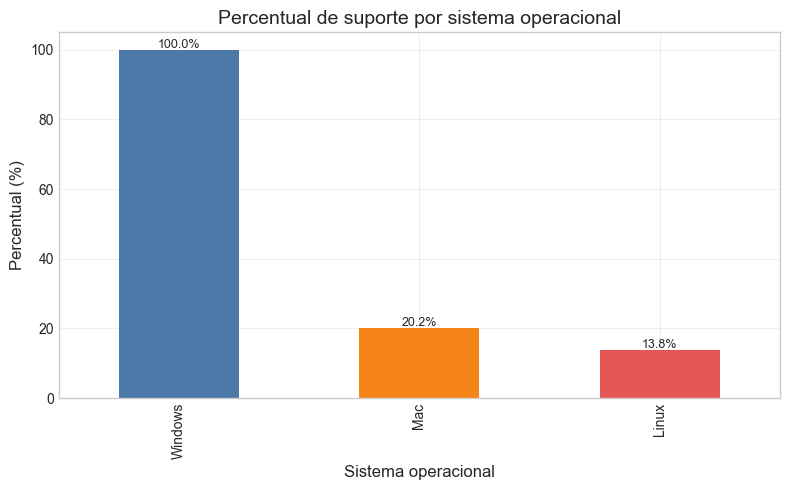

In [8]:
print("--- Gráfico 1: Percentual de suporte por Sistema Operacional ---")
aplicar_estilo() 
grafico_percentual_por_sistema(df)
plt.show()


## Gráfico 2
Número total de jogos single-player dos gêneros Indie e Estratégia lançados por ano (2010–2020).


--- Gráfico 2: Lançamentos Single-player (Indie vs Strategy) 2010–2020 ---


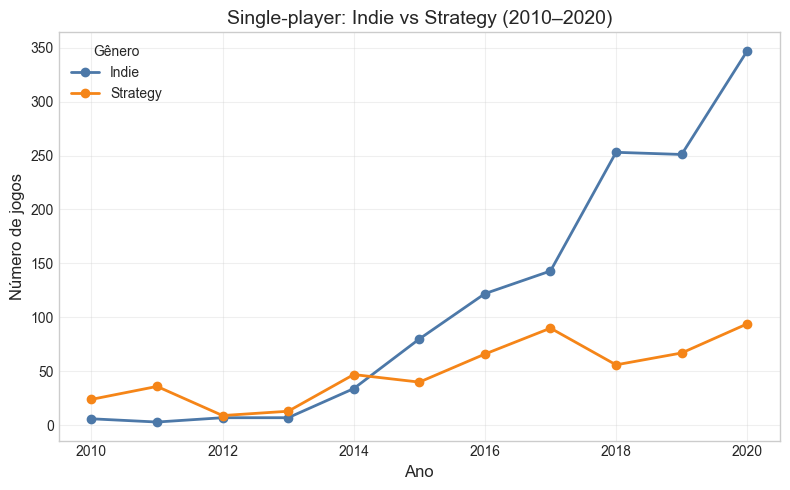

In [9]:
print("--- Gráfico 2: Lançamentos Single-player (Indie vs Strategy) 2010–2020 ---")
aplicar_estilo()
grafico_singleplayer_indie_estrategia(df)
plt.show()

## Pergunta adicional
Qual a evolução anual da média de Avaliações Positivas (a partir de 2010) entre jogos Pagos e Gratuitos (F2P)? Em particular, como essa tendência se manifesta no gênero de alto volume Indie? (demonstrado no gráfico)


--- Pergunta Adicional: Média de Avaliações Positivas (Pago vs Gratuito) por Gênero/Ano ---
   year               genero_principal  is_paid      Positive
0  2010                         action    False  12755.666667
1  2010                         action     True   3014.901961
2  2010               action,adventure    False   5353.250000
3  2010               action,adventure     True  15607.363636
4  2010        action,adventure,casual     True   1042.500000
5  2010  action,adventure,casual,indie     True     39.000000
6  2010    action,adventure,casual,rpg    False   8091.000000
7  2010         action,adventure,indie     True   9555.000000
8  2010     action,adventure,indie,rpg     True    430.000000
9  2010      action,adventure,strategy     True    905.500000

--- Gráfico Extra: Média de Avaliações Positivas para jogos Indie (Pago vs Gratuito) ---


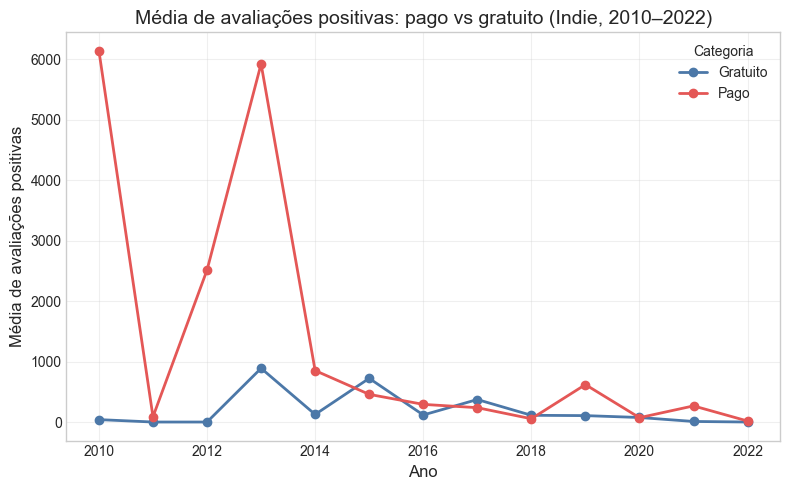

In [10]:
# Pergunta e Gráfico Adicional 

print("--- Pergunta Adicional: Média de Avaliações Positivas (Pago vs Gratuito) por Gênero/Ano ---")

extra_data = paid_vs_free_reviews(df)
print(extra_data.head(10))

print("\n--- Gráfico Extra: Média de Avaliações Positivas para jogos Indie (Pago vs Gratuito) ---")

aplicar_estilo()
grafico_paid_free_por_ano(df, genero='indie')
plt.show()


# Conclusões
- Jogos pagos tendem a ter mais avaliações positivas, mas há exceções em alguns anos.
- O suporte a Linux mostra tendência de crescimento entre 2018–2022.
- Publishers dominantes concentram grande parte dos jogos pagos.
- RPGs apresentam altos valores máximos de DLCs e avaliações, indicando popularidade.
- Indie e Estratégia têm ciclos diferentes de lançamento, mas ambos mostram crescimento em certos anos.
